In [59]:
#2-6 타이타닉 예제

import numpy  as np
import pandas as pd
import matplotlib.pyplot as pit
import seaborn as sns
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
titanic_df = pd.read_csv("/content/drive/MyDrive/train.csv")
titanic_df.head(3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [60]:
print('\n  ### 학습    데이터     정보   ###   \n')

print(titanic_df.info())


  ### 학습    데이터     정보   ###   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [61]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),  inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked' ].fillna('N', inplace=True)
print('데이터    세트   Null 값    개수 ', titanic_df.isnull().sum().sum())

데이터    세트   Null 값    개수  0


/tmp/ipython-input-2848790058.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(),  inplace=True)
/tmp/ipython-input-2848790058.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [62]:
print('    Sex  값    분포     ：\n',  titanic_df['Sex'].value_counts())
print('\n  Cabin 값    분포     ：\n',  titanic_df['Cabin'].value_counts())
print('\n Embarked  값    분포     ：\n',  titanic_df['Embarked'].value_counts())

    Sex  값    분포     ：
 Sex
male      577
female    314
Name: count, dtype: int64

  Cabin 값    분포     ：
 Cabin
N              687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E17              1
A24              1
C50              1
B42              1
C148             1
Name: count, Length: 148, dtype: int64

 Embarked  값    분포     ：
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [63]:
titanic_df['Cabin']    = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [64]:
titanic_df.groupby(['Sex',   'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

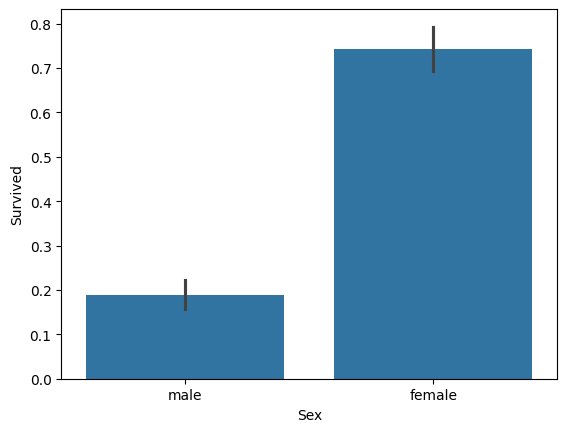

In [65]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

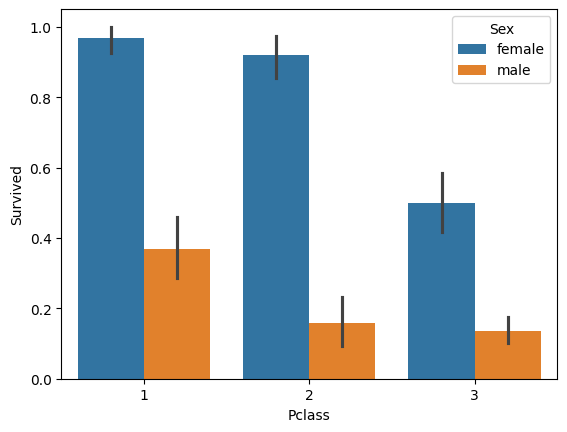

In [66]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

<Axes: xlabel='Age_cat', ylabel='Survived'>

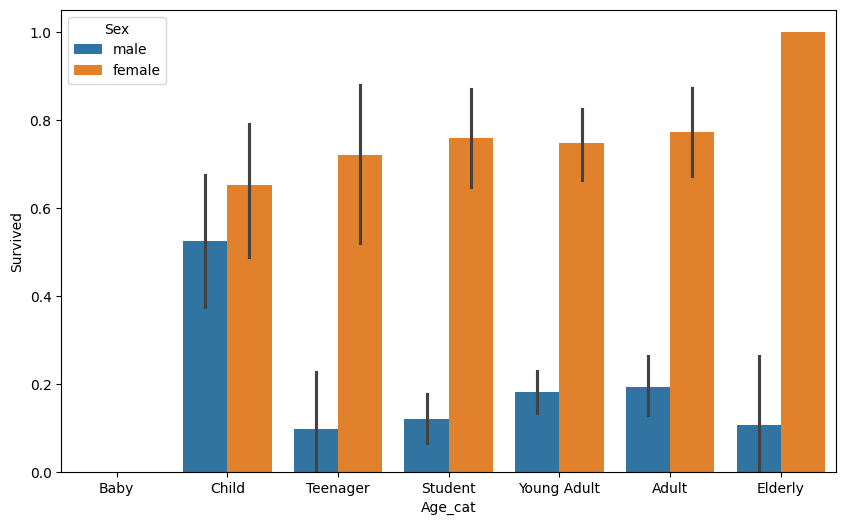

In [67]:
def get_category(age):
  cat = ''
  if age <= -1:
    cat = 'Baby'
  elif age <= 15:
    cat = 'Child'
  elif age <= 18:
    cat = 'Teenager'
  elif age <= 25:
    cat = 'Student'
  elif age <= 35:
    cat = 'Young Adult'
  elif age <= 60:
    cat = 'Adult'
  else:
    cat = 'Elderly'
  return cat

# Apply the function to create the 'Age_cat' column
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))


pit.figure(figsize=(10,6))
group_names = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)



In [68]:
from sklearn.preprocessing import LabelEncoder
def encode_features(dataDF):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])
  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,Young Adult


In [69]:
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0,inplace = True)
  return df

def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
  return df

def format_feature(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_feature(df)
  return df

In [70]:
titanic_df = pd.read_csv("/content/drive/MyDrive/train.csv")
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)



/tmp/ipython-input-1210150317.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-1210150317.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)
 #결정 트리, 랜덤 포레스트, 로지스틱 회귀를 이용

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# 분류
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver = 'liblinear')
# DesciisonTreeClassier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DesciisonTreeClassier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도:{0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DesciisonTreeClassier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도:0.8659


In [73]:
#교차 검증
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
  kfold = KFold(n_splits=folds)
  scores = []

  for iter_count,(train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print("교차 검증{0} 정확도:{1:.4f}".format(iter_count, accuracy))

  mean_score = np.mean(scores)
  print("평균 정확도:{0:.4f}".format(mean_score))

exec_kfold(dt_clf, folds=5)

교차 검증0 정확도:0.7542
교차 검증1 정확도:0.7809
교차 검증2 정확도:0.7865
교차 검증3 정확도:0.7697
교차 검증4 정확도:0.8202
평균 정확도:0.7823


In [74]:
#cross_val_score()

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)

for iter_count,accuracy in enumerate(scores):
  print("교차 검증{0} 정확도:{1:.4f}".format(iter_count, accuracy))

print("평균정확도:{0:.4f}".format(np.mean(scores)))

교차 검증0 정확도:0.7430
교차 검증1 정확도:0.7753
교차 검증2 정확도:0.7921
교차 검증3 정확도:0.7865
교차 검증4 정확도:0.8427
평균정확도:0.7879


In [75]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[2, 3, 5, 10],
'min_samples_split':[2, 3, 5], 'min_samples_leaf':[1, 5, 8]}


grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy',cv=5)


grid_dclf.fit(X_train, y_train)


print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)


print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))


best_dclf = grid_dclf.best_estimator_


# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.


dpredictions = best_dclf.predict(X_test)


acc나racy = accuracy_score(y_test, dpredictions)


print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}' .format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8427


In [76]:
#3-6장 실습(피마 인디언 당뇨병 예측)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve
)

# 데이터 로드
from google.colab import drive
drive.mount('/content/drive')
diabetes_data = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
display(diabetes_data.head(3))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [77]:
diabetes_data.info()
display(diabetes_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [92]:
# 6) 평가지표 함수(정확도/정밀도/재현율/F1/ROC-AUC)
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))


In [103]:

from time import get_clock_info
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]


# stratify=y, random_state=156 (원문 설정)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=156, stratify=y)


# 로지스틱 회귀 학습/예측
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[89 11]
 [19 35]]
정확도: 0.8052, 정밀도: 0.7609, 재현율: 0.6481, F1: 0.7000, AUC: 0.8461


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba_c1):
    """
    책의 precision_recall_curve_plot 함수(오타 수정판).
    - y_test: 실제 레이블(0/1)
    - pred_proba_c1: 예측확률 중 '클래스 1'의 확률 벡터 (e.g., clf.predict_proba(X)[:, 1])
    """
    # threshold별 정밀도/재현율 계산
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    # thresholds 길이 = N, precision/recall 길이 = N+1 이라 축 맞춤 필요
    threshold_boundary = thresholds.shape[0]

    plt.figure(figsize=(8, 6))
    # 정밀도는 점선, 재현율은 실선으로
    plt.plot(thresholds, precisions[:threshold_boundary], linestyle="--", label="precision")
    plt.plot(thresholds, recalls[:threshold_boundary], label="recall")

    # X축 눈금을 0.1 간격으로 보기 좋게
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel("Threshold value")
    plt.ylabel("Precision and Recall value")
    plt.legend()
    plt.grid()
    plt.show()


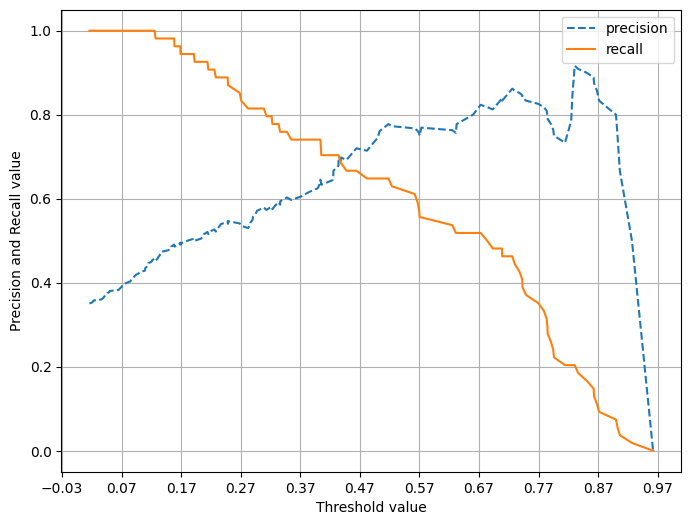

In [106]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1 ]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [107]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


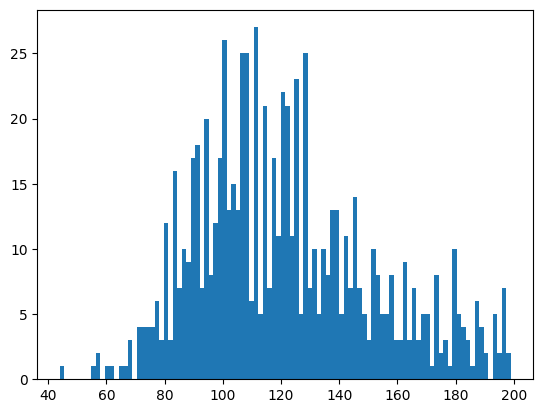

In [108]:
plt.hist(diabetes_data['Glucose'], bins=100)
plt.show()

In [109]:
# 3) 0값 분포 점검 (의학적으로 0이 불가능한 피처들)
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

total_count = diabetes_data['Glucose'].count()

for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100 * zero_count / total_count))


Glucose 0 건수는 0, 퍼센트는 0.00 %
BloodPressure 0 건수는 0, 퍼센트는 0.00 %
SkinThickness 0 건수는 0, 퍼센트는 0.00 %
Insulin 0 건수는 0, 퍼센트는 0.00 %
BMI 0 건수는 0, 퍼센트는 0.00 %


In [110]:
# 4) 0값을 각 피처 평균값으로 대체
# 원문 의도대로: 0을 평균으로 치환(평균 계산은 0 포함한 단순 평균)
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)


In [111]:
# 5) 스케일링, 데이터 분할, 로지스틱 회귀 학습/평가
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# StandardScaler로 전체 피처 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# stratify=y, random_state=156 (원문 설정)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=156, stratify=y
)

# 로지스틱 회귀 학습/예측
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

# 7) 최종 평가 호출
get_clf_eval(y_test, pred, pred_proba)


오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804, AUC: 0.8433


In [113]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    """
    여러 개의 threshold 값을 받아서 각각 정밀도·재현율·정확도·오차행렬을 출력.
    - y_test: 실제 레이블 (0/1)
    - pred_proba_c1: 예측확률 벡터 (clf.predict_proba(X)[:, 1])
    - thresholds: 확인할 임곗값 리스트/배열
    """
    for custom_threshold in thresholds:
        binarized = (pred_proba_c1 >= custom_threshold).astype(int)

        acc = accuracy_score(y_test, binarized)
        precision = precision_score(y_test, binarized)
        recall = recall_score(y_test, binarized)

        print("임곗값:", custom_threshold)
        print("오차행렬:\n", confusion_matrix(y_test, binarized))
        print("정확도:{0:.3f}, 정밀도:{1:.3f}, 재현율:{2:.3f}\n".format(acc, precision, recall))


In [114]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,  1), thresholds )

임곗값: 0.3
오차행렬:
 [[67 33]
 [11 43]]
정확도:0.714, 정밀도:0.566, 재현율:0.796

임곗값: 0.33
오차행렬:
 [[72 28]
 [12 42]]
정확도:0.740, 정밀도:0.600, 재현율:0.778

임곗값: 0.36
오차행렬:
 [[76 24]
 [15 39]]
정확도:0.747, 정밀도:0.619, 재현율:0.722

임곗값: 0.39
오차행렬:
 [[78 22]
 [16 38]]
정확도:0.753, 정밀도:0.633, 재현율:0.704

임곗값: 0.42
오차행렬:
 [[84 16]
 [18 36]]
정확도:0.779, 정밀도:0.692, 재현율:0.667

임곗값: 0.45
오차행렬:
 [[85 15]
 [18 36]]
정확도:0.786, 정밀도:0.706, 재현율:0.667

임곗값: 0.48
오차행렬:
 [[88 12]
 [19 35]]
정확도:0.799, 정밀도:0.745, 재현율:0.648

임곗값: 0.5
오차행렬:
 [[90 10]
 [21 33]]
정확도:0.799, 정밀도:0.767, 재현율:0.611



In [117]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.48)
pre_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))
get_clf_eval(y_test, pre_th_048, pred_proba[:, 1])

오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC: 0.8433
